In [ ]:
# CNN Implementation - dogs breed dataset - data augmented

In [ ]:
# Image Augmentation

# from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
# import numpy as np

# import cv2
# import os

# data_path = "//content/drive/MyDrive/CNN/Dogs_breed_dataset_img_augmented"

# categories = os.listdir(data_path)

# for category in categories: # categories = [14 dog names]

#   folder_path = os.path.join(data_path,category) # folder path will be set to corresponding dogname folder
#   img_names = os.listdir(folder_path) # lists the names of images in dogname folders in a list

#   category_range = 10

#   for r in range(category_range):
#     img_name = img_names[r]
#     img_path = os.path.join(folder_path,img_name) # takes the path of each image
#     img = cv2.imread(img_path) # reads each image

#     datagen = load_img(img_path)
#     x = img_to_array(datagen)
#     x = x.reshape((1,)+x.shape)
#     image_aug = ImageDataGenerator(rotation_range=40, horizontal_flip=True)

#     i = 0
#     for batch in image_aug.flow(x,batch_size=1,save_to_dir=f"/content/drive/MyDrive/CNN/Dogs_breed_dataset_img_augmented/{category}",save_prefix=category,save_format="jpeg"):
#       i += 1
#       if i > 25:
#         break

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import os

In [ ]:
data_path = "/content/drive/MyDrive/CNN/Dogs_breed_dataset_img_augmented"

In [ ]:
categories = os.listdir(data_path)

In [ ]:
labels = [i for i in range(len(categories))]
labels_dict = dict(zip(categories,labels))
labels_dict # target categories is labelled as numericals now

{'Bulldog dog': 0,
 'Bugg dog': 1,
 'Boxer dog': 2,
 'Borzoi dog': 3,
 'Bocker dog': 4,
 'Bichon Frise dog': 5,
 'Belgian Tervuren dog': 6,
 'Beagle dog': 7,
 'Auggie dog': 8,
 'American Bulldog dog': 9,
 'Alaskan Malamute dog': 10,
 'Akita dog': 11,
 'Afgan Hound dog': 12,
 'Affenhuahua dog': 13}

In [ ]:
img_size = 150
data = []
target = []

for category in categories:
  folder_path = os.path.join(data_path, category)
  img_names = os.listdir(folder_path)

  for img_name in img_names:
    img_path = os.path.join(folder_path, img_name)
    img = cv2.imread(img_path)

    try:
      img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      img_gray_resized = cv2.resize(img_gray, (img_size, img_size))
      data.append(img_gray_resized)
      target.append(labels_dict[category])

    except Exception as e:
      print("Exception", e)

Exception OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

Exception OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

Exception OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'



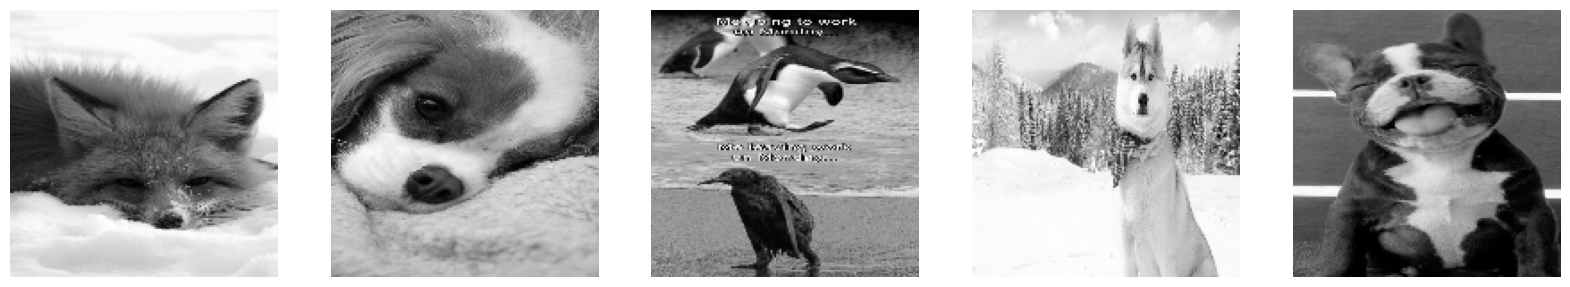

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20, 10))
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(data[i], cmap="gray")
  plt.axis("off")

plt.show()

In [ ]:
import numpy as np
data = np.array(data)/255.0
data = np.reshape(data, (data.shape[0], img_size, img_size, 1))
target = np.array(target)

In [ ]:
from tensorflow.keras.utils import to_categorical
new_target = to_categorical(target)
new_target

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_target, test_target = train_test_split(data, new_target, test_size = 0.2)

In [ ]:
test_target.shape

(861, 14)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(128, (3,3), activation="relu", input_shape = (img_size, img_size, 1)))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32, (3,3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(128, activation = "relu"))

model.add(Dense(14, activation = "softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
train_data.shape

(3443, 150, 150, 1)

In [ ]:
new_target.shape

(4304, 14)

In [ ]:
history = model.fit(train_data, train_target, epochs = 10, validation_split = 0.2)

Epoch 1/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 379s 4s/step - accuracy: 0.9722 - loss: 0.1032 - val_accuracy: 0.8403 - val_loss: 1.0116
Epoch 2/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 345s 4s/step - accuracy: 0.9792 - loss: 0.0779 - val_accuracy: 0.8462 - val_loss: 0.9727
Epoch 3/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 386s 4s/step - accuracy: 0.9725 - loss: 0.0986 - val_accuracy: 0.8563 - val_loss: 0.9430
Epoch 4/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 369s 4s/step - accuracy: 0.9831 - loss: 0.0592 - val_accuracy: 0.8520 - val_loss: 0.9654
Epoch 5/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 336s 4s/step - accuracy: 0.9876 - loss: 0.0335 - val_accuracy: 0.8679 - val_loss: 0.8878
Epoch 6/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 376s 4s/step - accuracy: 0.9823 - loss: 0.0682 - val_accuracy: 0.8520 - val_loss: 0.8916
Epoch 7/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 403s 4s/step - accuracy: 0.9818 - loss: 0.0629 - val_accuracy: 0.8491 - val_loss: 0.8148
Epoch 8/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 365s 4s/step - accuracy: 0.9880 - loss: 0.0351 - val_accuracy: 0.8650 - v

In [ ]:
y_predicted = model.predict(test_data)

27/27 ━━━━━━━━━━━━━━━━━━━━ 25s 928ms/step


In [ ]:
y_predicted = np.argmax(y_predicted,axis=1)
y_predicted

In [ ]:
test_target = np.argmax(test_target,axis=1)
test_target

array([12,  9,  5, 11,  9, 11,  3,  3,  1,  1, 13, 13,  3,  7, 13,  5, 11,
       12, 13,  1, 11, 10,  5, 10,  7,  8, 13, 10,  6,  4,  8,  6,  7, 12,
        8,  6,  4, 10, 11,  5,  0,  6,  6,  6,  9,  6,  4, 11, 13,  5,  1,
        1,  6,  7,  9,  8,  2, 13,  8,  2,  6, 10,  0,  7,  1,  1, 11,  4,
       10,  8,  9,  5,  3,  7,  1,  4, 12,  8, 13, 13, 11, 10, 12,  0,  2,
        4, 11,  2,  8, 13,  8, 11,  3, 11,  9, 11, 10,  4, 10,  6,  3,  1,
        9,  8,  3,  4,  6,  4, 12,  0, 13,  6, 12,  1,  8,  0, 10,  5,  4,
        9,  7,  0,  5,  0,  2,  0,  1, 11,  2,  4, 12,  9, 10, 10, 13,  1,
       13,  2,  7,  7,  9,  6, 10, 13,  8,  5,  3, 13,  3,  0, 12,  7,  6,
        5, 11,  6,  2,  0,  6,  3, 12, 13,  9,  6,  8,  8,  1,  3, 10,  1,
        0,  0, 10,  4,  8,  4,  0, 10,  3,  6,  7,  1,  8,  4, 11,  0,  9,
        0,  4,  9,  8,  4,  5, 12,  0, 12,  0,  5, 10,  9,  2,  1,  0, 10,
       10,  5,  2, 12,  4, 11,  4,  8,  9,  2,  0,  5, 11,  0,  9, 11, 11,
       10, 12,  1,  6,  9

In [ ]:
# Performance Evaluation using Accuracy Score

from sklearn.metrics import accuracy_score
accuracy_score(y_predicted,test_target)

0.826945412311266

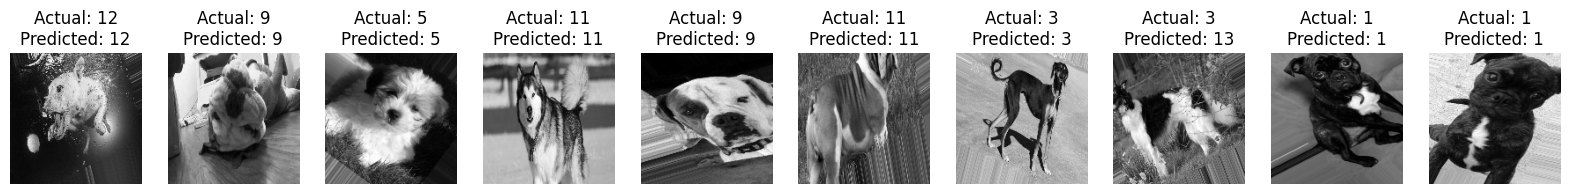

In [ ]:
plt.figure(figsize=(20,10))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(test_data[i].reshape(150,150),cmap="gray")
  plt.axis("off")
  plt.title(f"Actual: {test_target[i]}\nPredicted: {y_predicted[i]}")
plt.show()